In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Perform required cleaning to bring the uniformity in the data

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### 1)Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.

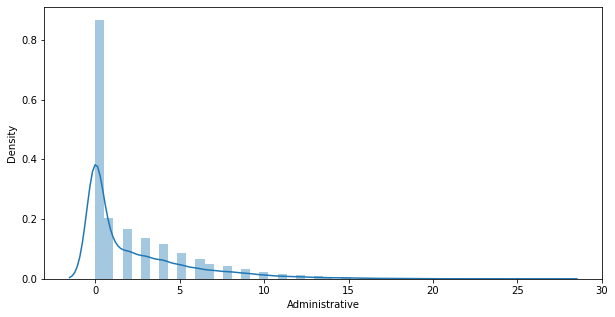

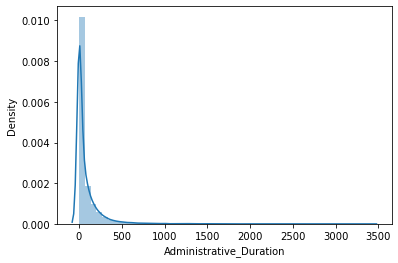

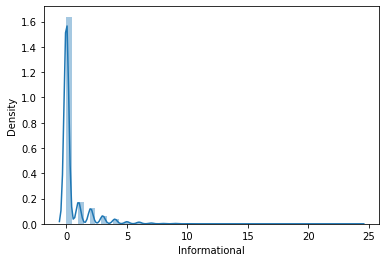

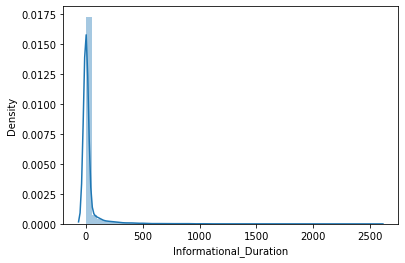

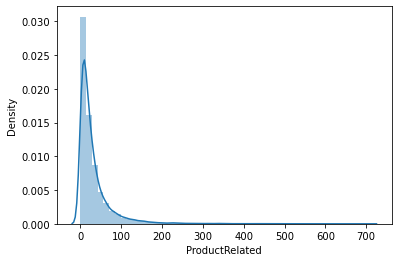

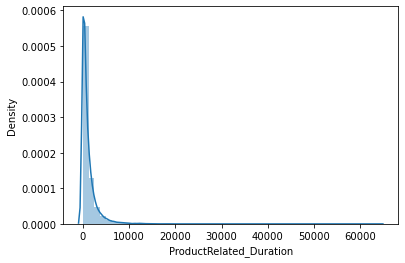

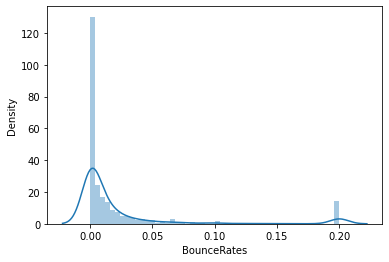

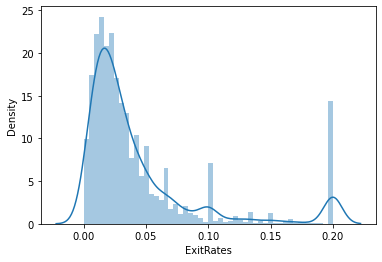

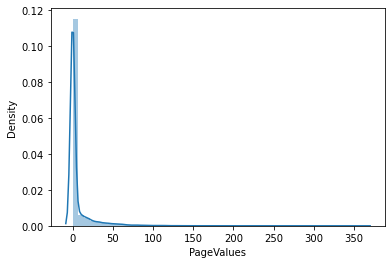

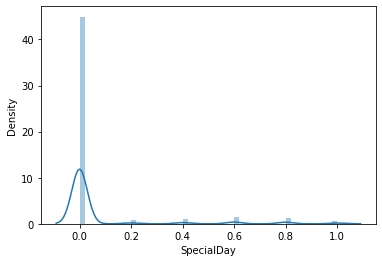

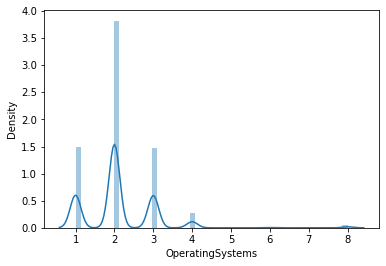

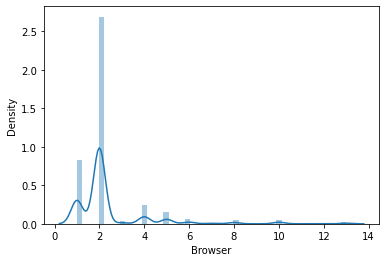

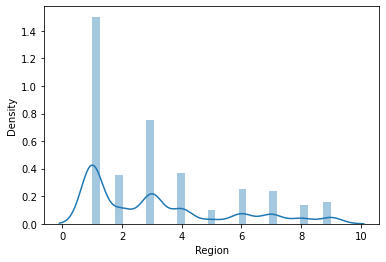

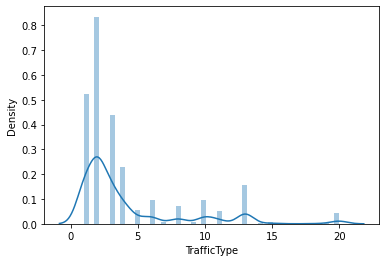

In [5]:
plt.figure(figsize = (10,5))
l = df.select_dtypes(include = 'number').columns
for i in l:
    sns.distplot(df[i])
    
    plt.show()

<AxesSubplot:>

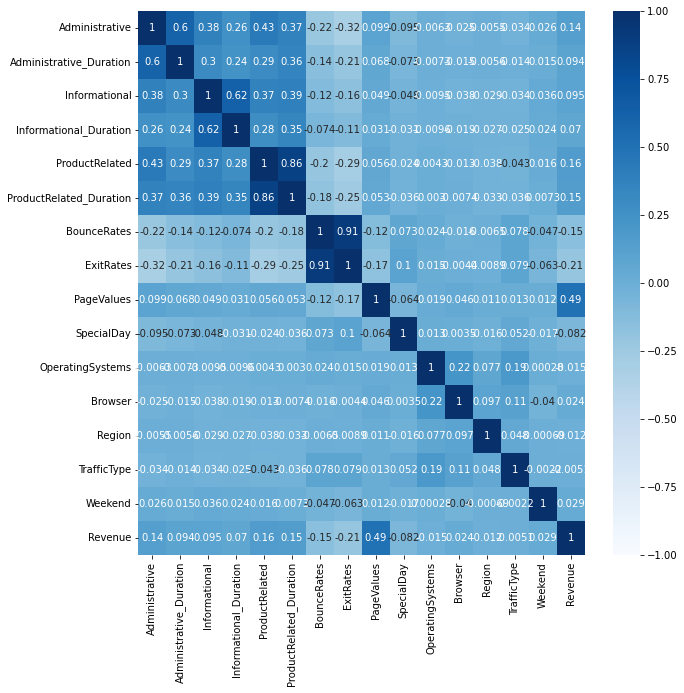

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True,vmin = '-1')

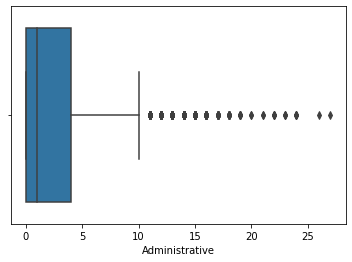

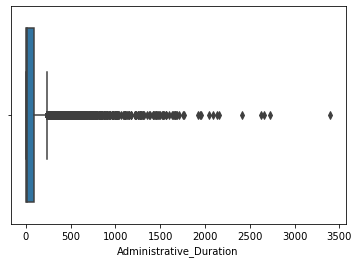

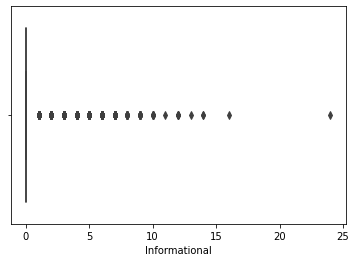

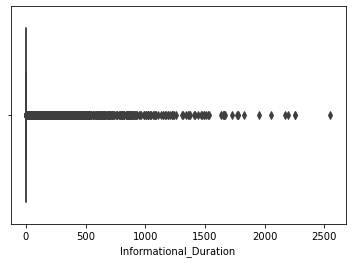

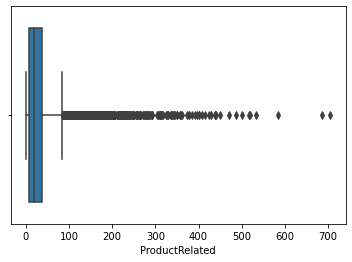

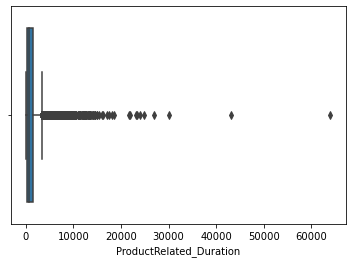

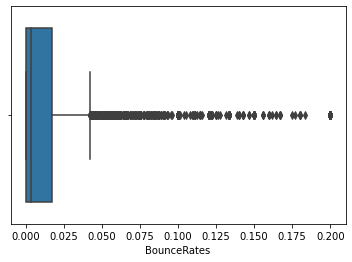

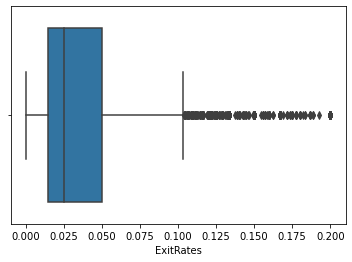

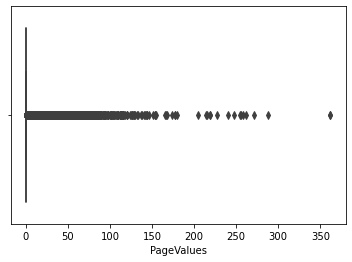

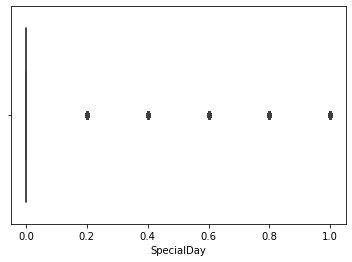

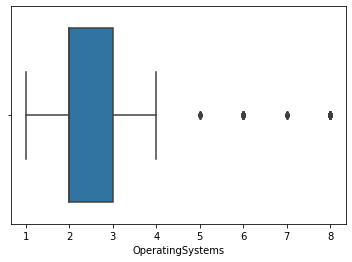

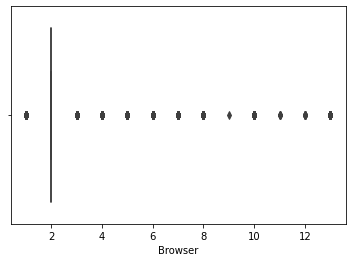

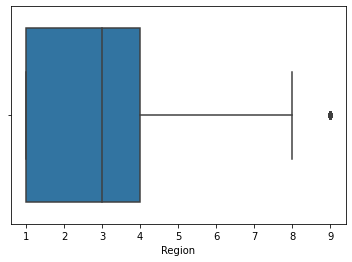

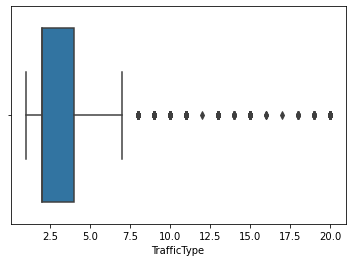

In [7]:
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(df[i])
    plt.show()

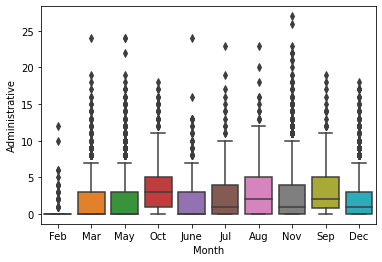

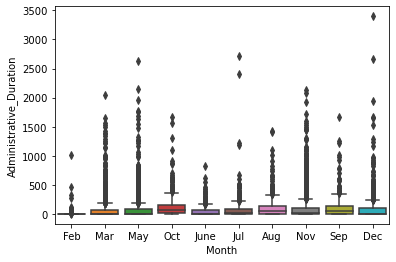

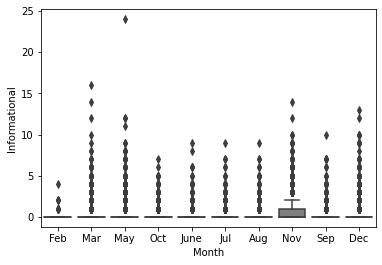

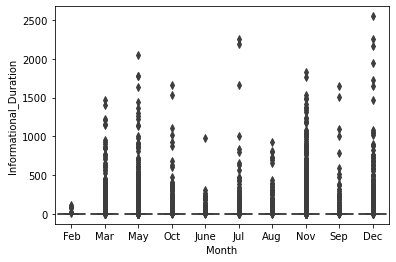

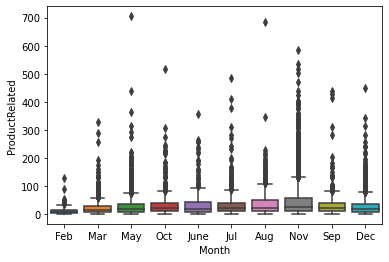

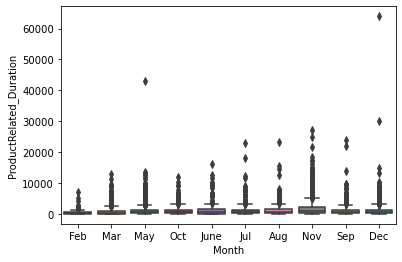

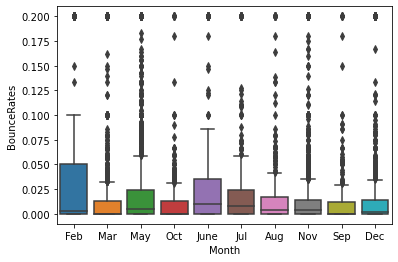

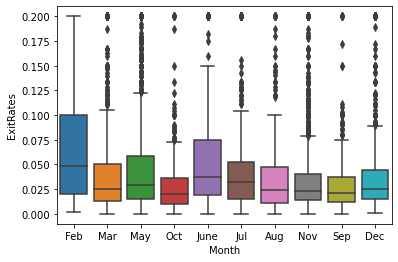

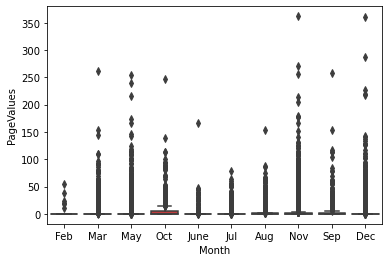

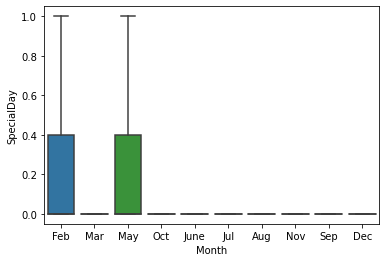

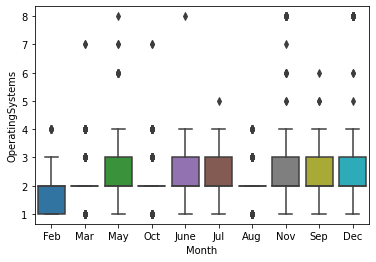

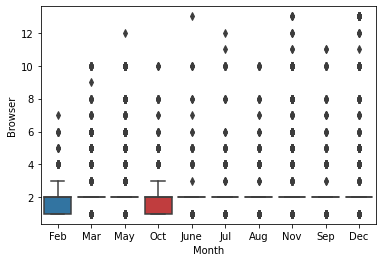

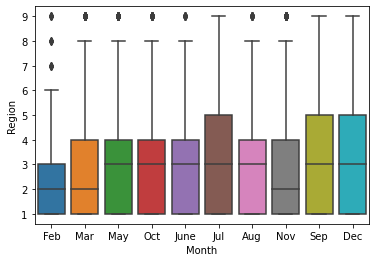

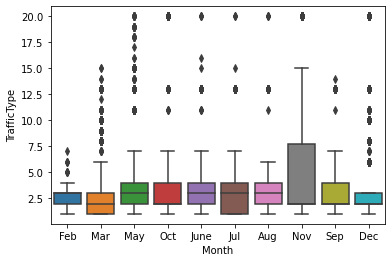

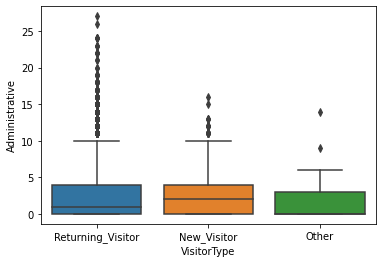

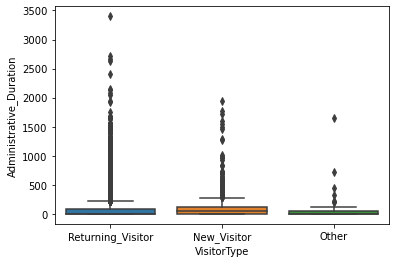

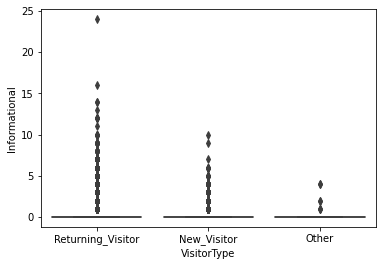

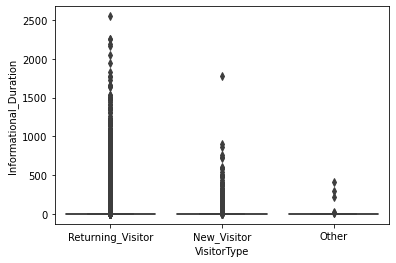

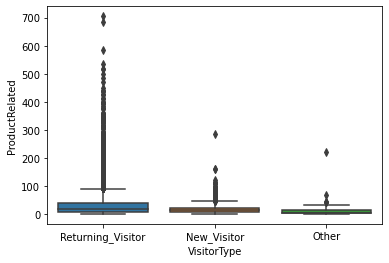

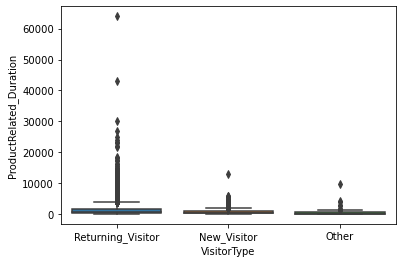

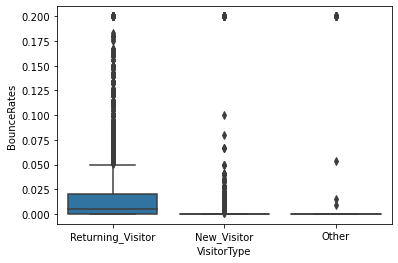

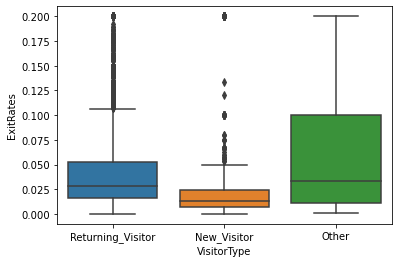

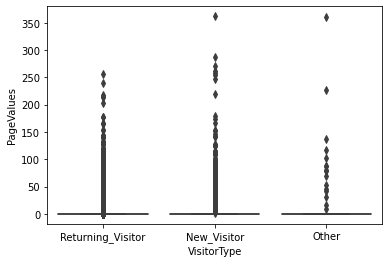

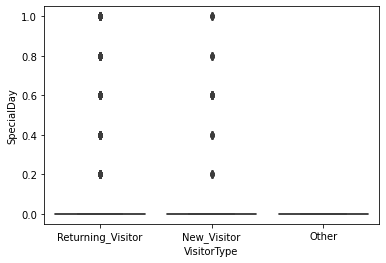

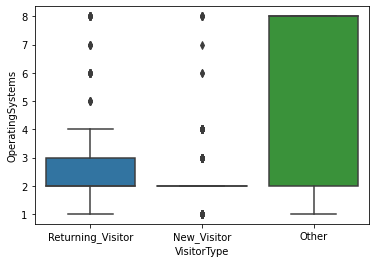

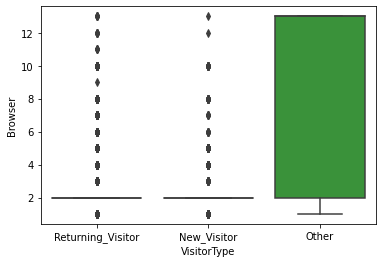

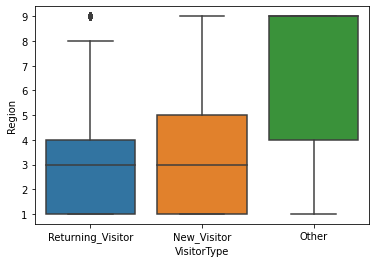

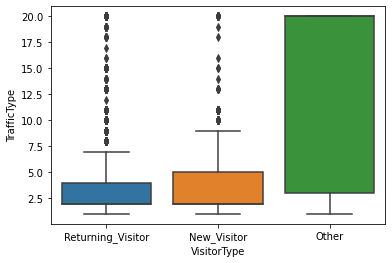

In [8]:
f = df.select_dtypes(include = 'object').columns
l = df.select_dtypes(include = 'number').columns
for i in f:
    for j in l:
        sns.boxplot(x = df[i], y = df[j], data = df)
        plt.show()

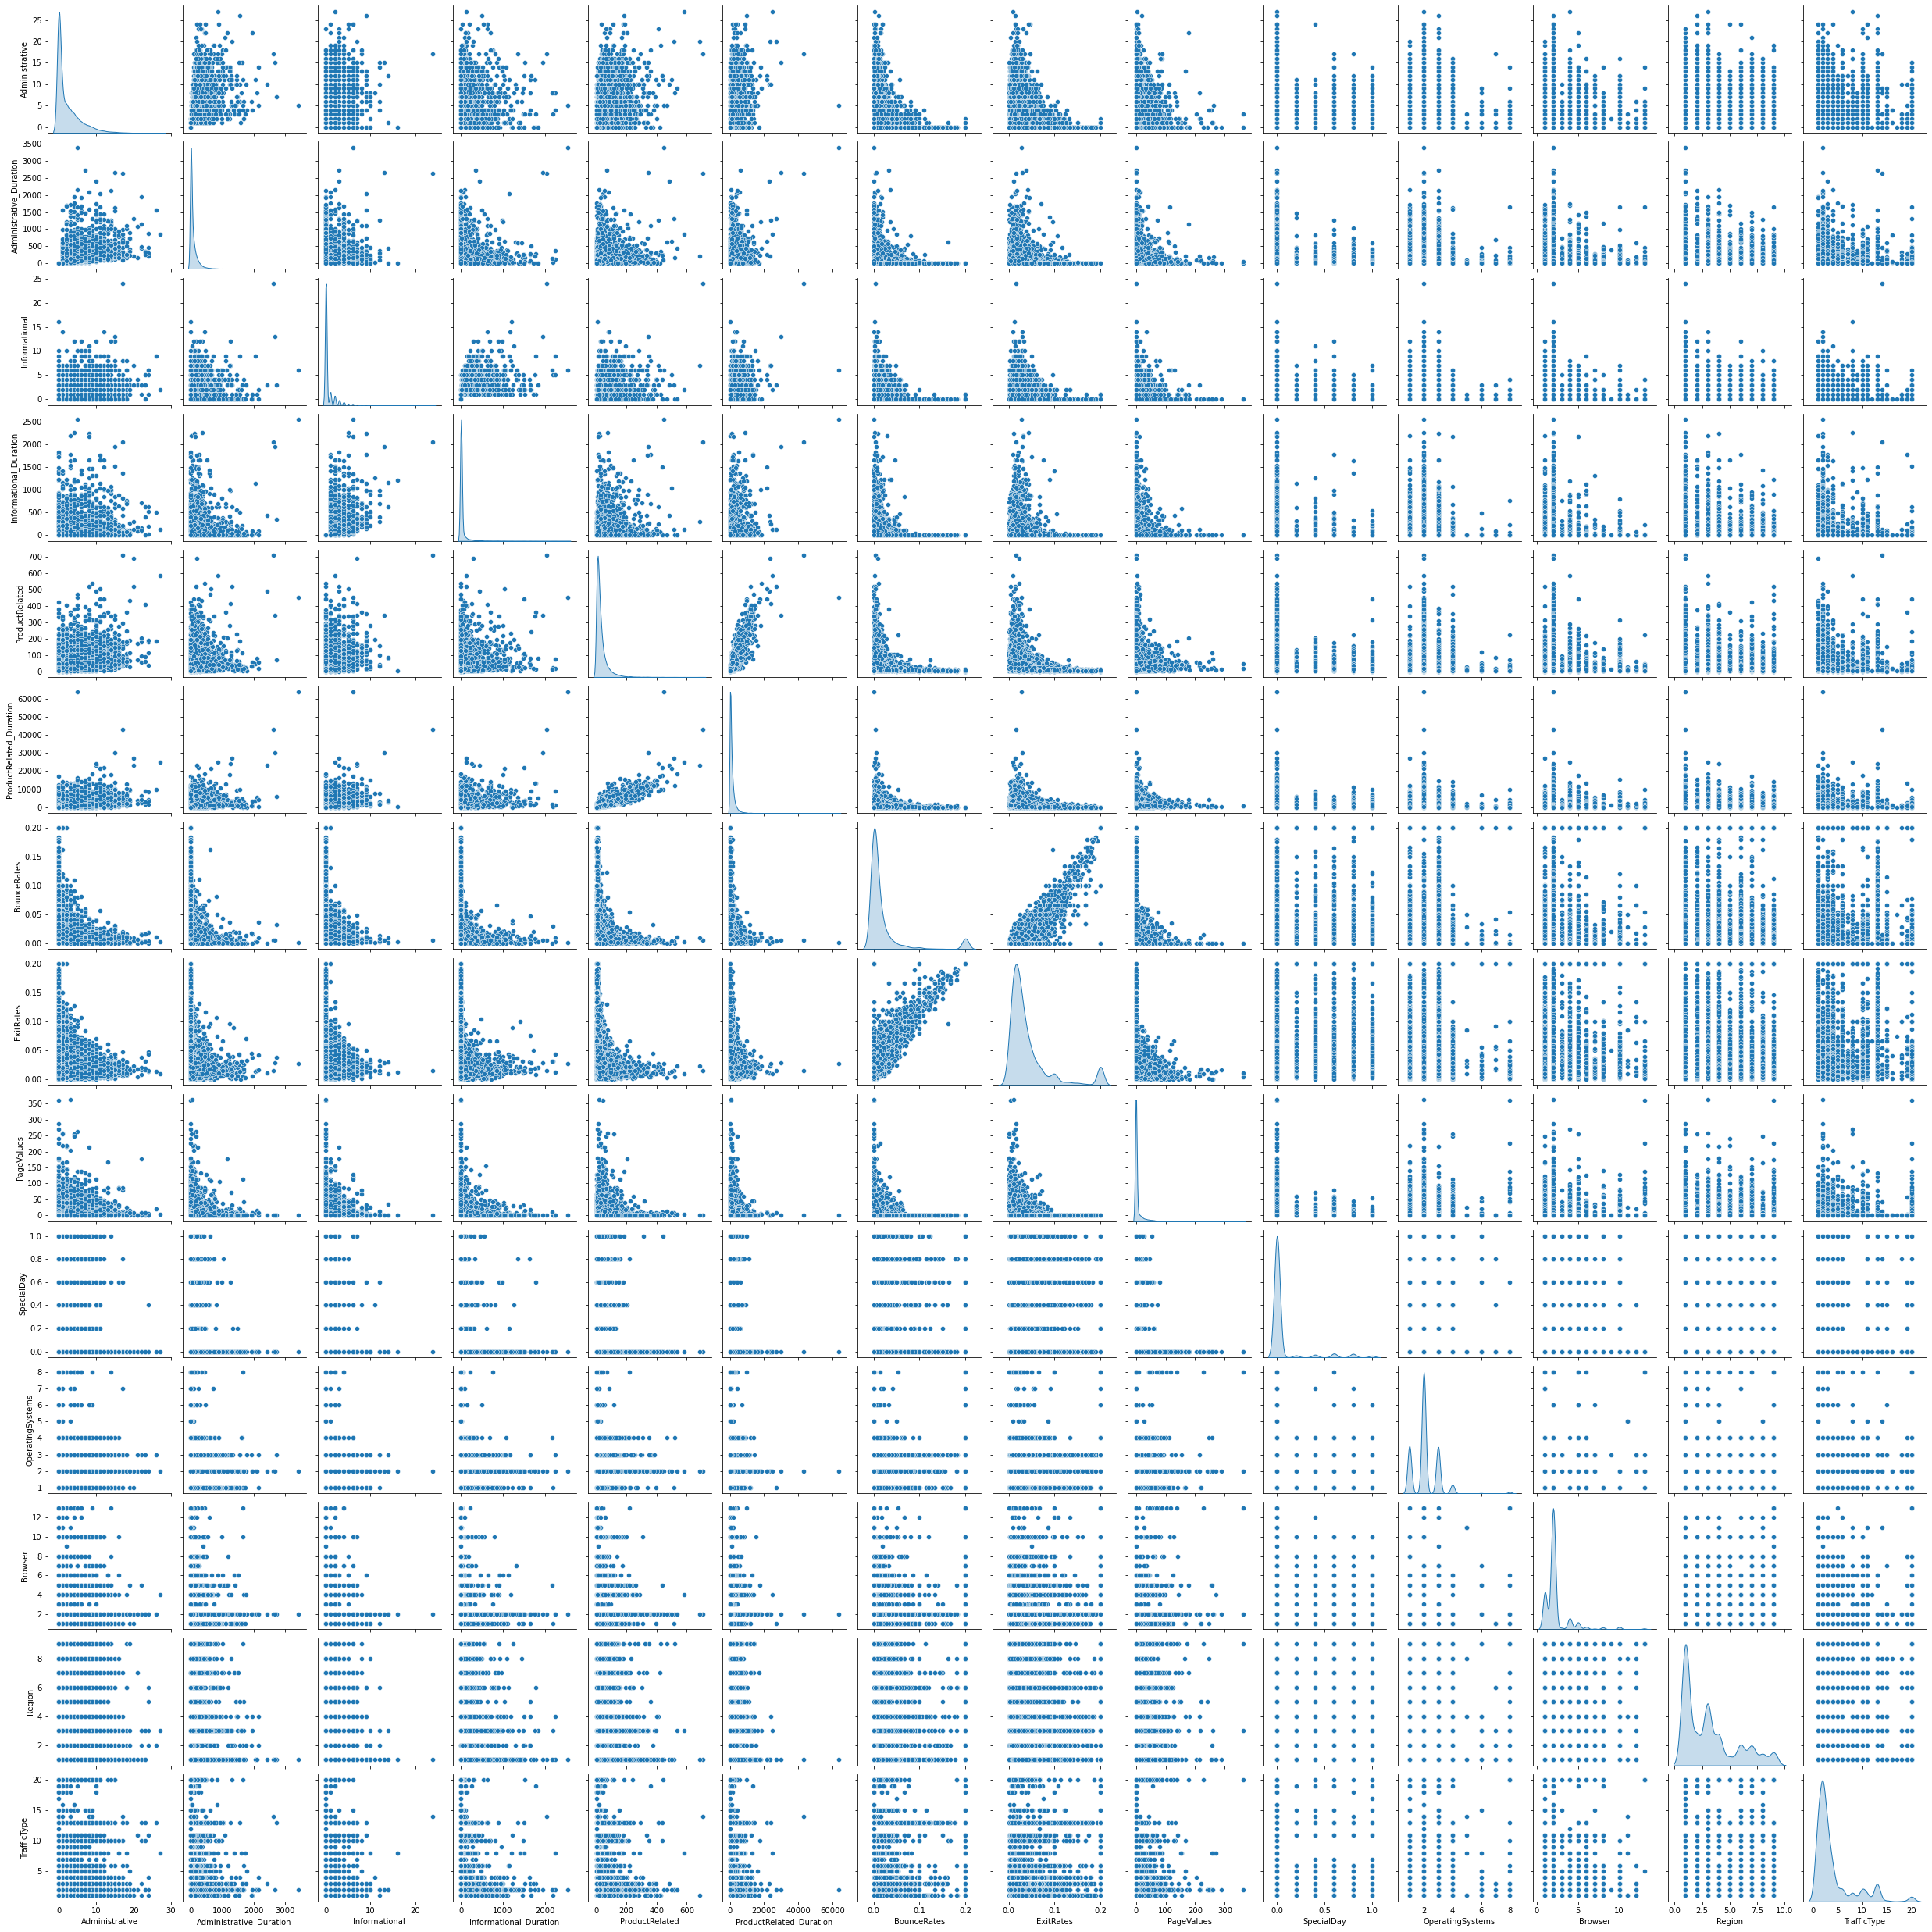

In [9]:
sns.pairplot(df.select_dtypes(include  = 'number'), diag_kind = 'kde')

<b>Inferences:</b>
<p>It is visible that almost all the columns are positively skewed. This means that most of the users lie in the smaller metrics of dimensions.</p>
It is visible that almost all the numerical columns in our data set have outliers. We now have to check the significance of out outliers and treat them respectively.

#### 2)Perform required missing value treatment

In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


It is visible that there are no missing values. There are many columns where many grains of data are at 0. We cannot drop these columns because it indicates the amount of time a customer spends on the website.

In [12]:
df.duplicated().sum()

125

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(12205, 18)

We have now dropped duplicate rows.

#### 3)Perform required encoding techniques

In [15]:
df['Weekend']= df['Weekend'].astype('object')
df['Revenue'] = df['Revenue'].astype('object')

In [16]:
f = df.select_dtypes(include = 'object')
for i in f:
    print('Column',i,'has this many unique values:',df[i].nunique())

Column Month has this many unique values: 10
Column VisitorType has this many unique values: 3
Column Weekend has this many unique values: 2
Column Revenue has this many unique values: 2


We see that our data has catagorical columns that have more than one two unique values. We need to encode these columns for futher analysis.

In [17]:
le = LabelEncoder()
for i in f:
    df[i] = le.fit_transform(df[i])
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int32  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

After encoding, we now see that we have no object type dimensions left in the dataset.

#### 4) Perform Outlier treatment if required

Since our dataset is bound to have outliers, we do not drop them as they are all important to see what kind of customers we have and what cluster they belong in.

#### 5)Perform appropriate scaling

We now scale the data so that the Kmeans algorithm can run on it efficiently. We do this since the Eculidean Distance can be otherwise biased and impared by different scales of different dimensions. This will reduce that and make it easier for the algorithm to properly cluster the data.

In [19]:
sc = StandardScaler()
l = df.columns
scaled = sc.fit_transform(df)
X = pd.DataFrame(scaled, columns= l)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,-0.553088,-0.430461
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,-0.553088,-0.430461
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,-0.553088,-0.430461
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,-0.553088,-0.430461
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,1.808031,-0.430461


Our data is now ready for building clusters.

<h1>Building the Different Cluster Models</h1>

In [20]:
km = KMeans(n_clusters=3)
km.fit(X)
y_kmeans = km.predict(X)

In [21]:
df['Cluster'] = y_kmeans

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0,0


In [23]:
df['Cluster'].value_counts()

0    9603
1    1656
2     946
Name: Cluster, dtype: int64

We have now built three different clusters for our dataset. Before we can finalise on these clusters we need to calculate the Within Sum of Squares for different number of clusters and find one that most accurately clusters them with the least WSS.

#### Analyse the optimum number of cluster using appropriate techniques.
	

In [24]:
wss = []
km_c = range(1,12)

for i in km_c:
    km = KMeans(n_clusters=i)
    km.fit(X)
    y_kmeans = km.predict(X)
    wss.append(km.inertia_)

<AxesSubplot:>

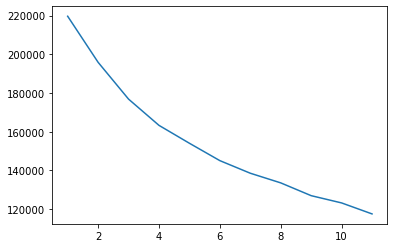

In [25]:
sns.lineplot(x = km_c, y = wss,palette='rainbow')

We see a sudden drop of Inertia at Number of CLusters = 6

<h3> Appropriate Number of Clusters = 6</h3>

#### Make the appropriate business interpretation using the cluster centroids.

In [26]:
km = KMeans(n_clusters=6)
km.fit(X)
y_kmeans = km.predict(X)
df['Cluster'] = y_kmeans

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0,3
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0,1


In [28]:
km.cluster_centers_

array([[ 1.01969366e-01,  6.73579594e-02, -1.63518557e-01,
        -1.49018030e-01, -3.52060727e-01, -3.43341249e-01,
        -4.04919169e-01, -4.83798019e-01, -2.54034262e-01,
        -2.85861619e-01, -1.18626088e-01,  5.41389495e-02,
         9.60909389e-02,  1.20379255e-01,  3.96202247e-02,
        -2.43639404e+00,  1.20771153e-01, -1.86783873e-01],
       [-1.89552893e-01, -1.68683838e-01, -2.05996109e-01,
        -1.77400129e-01, -1.63246461e-01, -1.53393849e-01,
        -2.03556693e-01, -1.06817888e-01, -2.40476554e-01,
        -2.90374719e-01, -6.21095124e-02, -1.93256440e-02,
        -2.65660343e-02,  6.00244049e-03, -4.45031845e-02,
         4.06344619e-01, -1.33518173e-02, -4.30461018e-01],
       [ 9.88839523e-02,  4.67979943e-02, -6.54719249e-02,
        -1.05608030e-01,  7.70488289e-02,  8.62337625e-02,
        -3.43235312e-01, -4.79384681e-01,  1.51022922e+00,
        -2.56588085e-01,  1.65005615e-01, -1.23660348e-02,
         9.21293743e-02, -1.27764838e-03,  3.71635291e

#### Perform the EDA on cluster groups to understand the cluster characteristics.

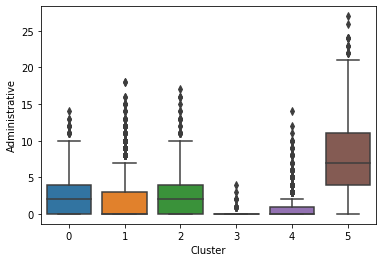

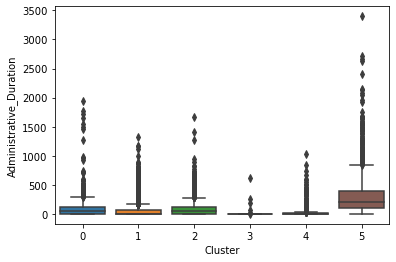

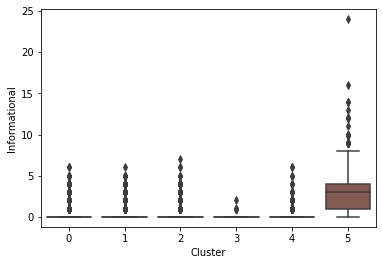

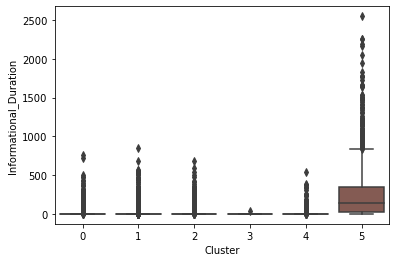

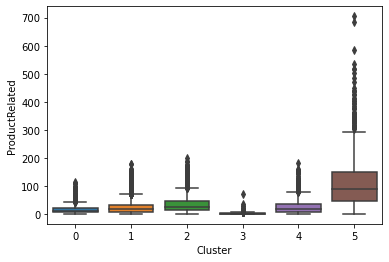

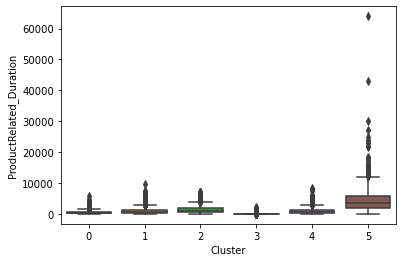

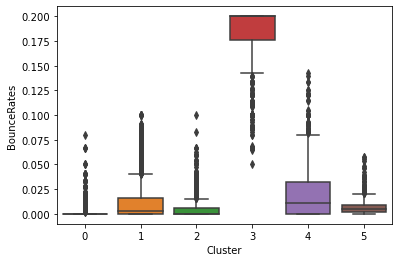

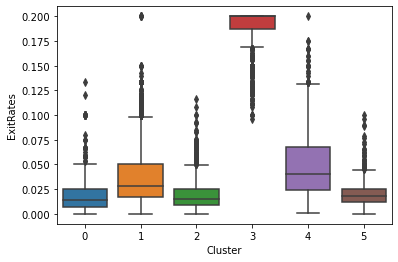

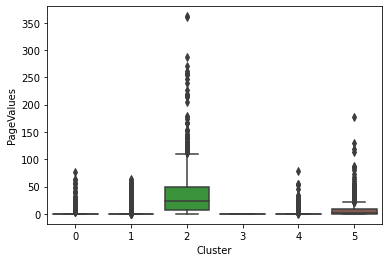

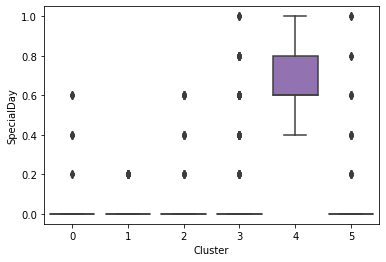

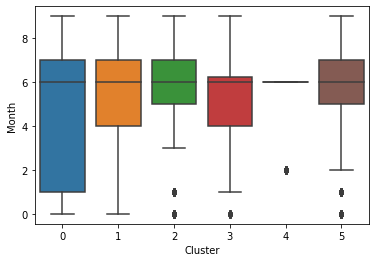

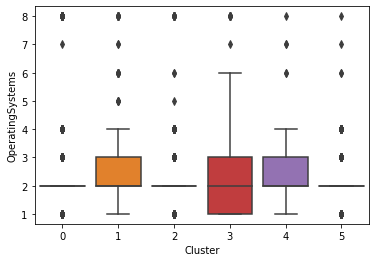

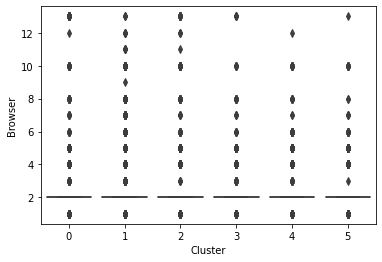

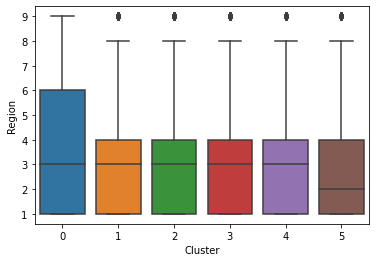

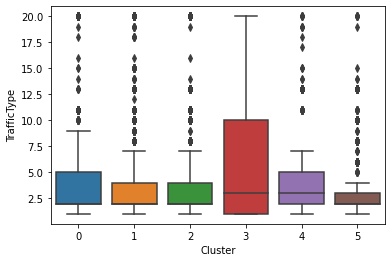

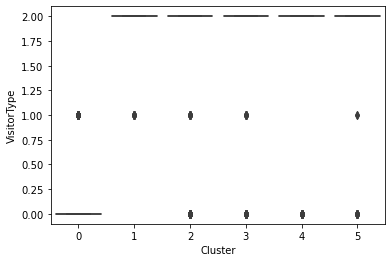

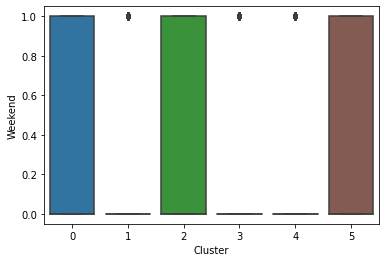

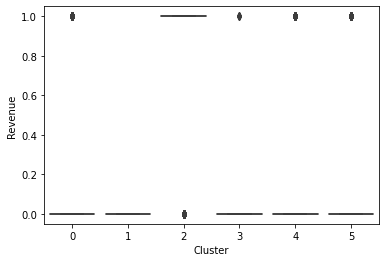

In [29]:
l = df.drop(columns= ['Cluster']).columns
for i in l:
    sns.boxplot(x = df['Cluster'], y= df[i])
    plt.show()

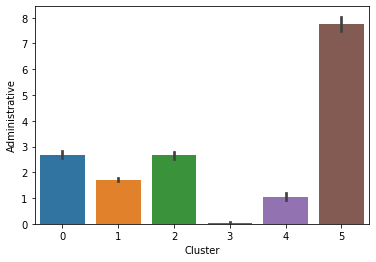

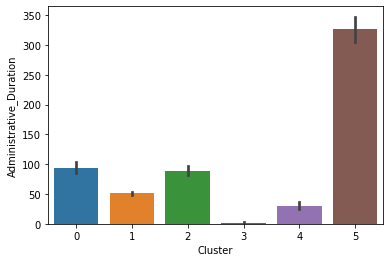

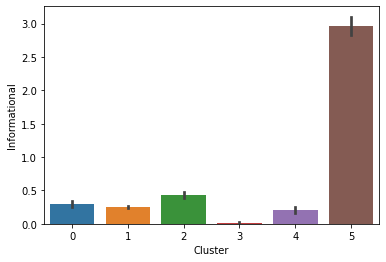

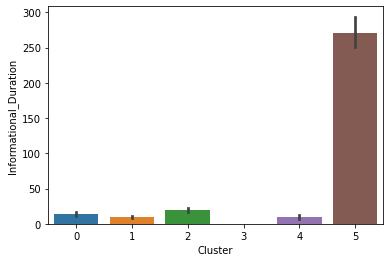

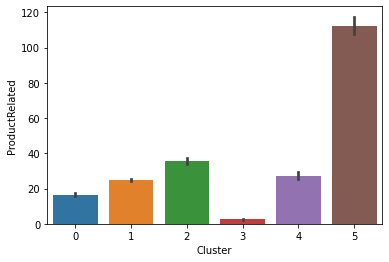

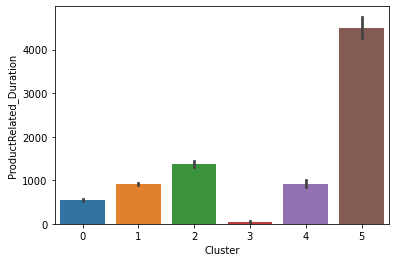

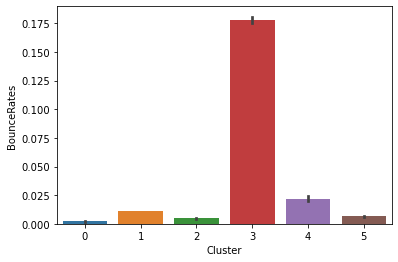

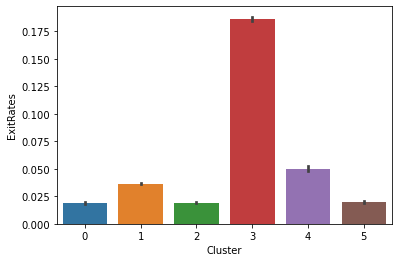

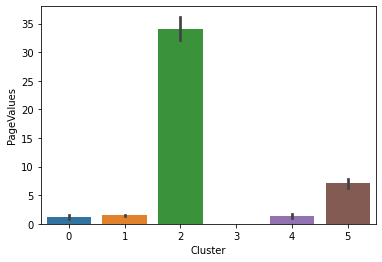

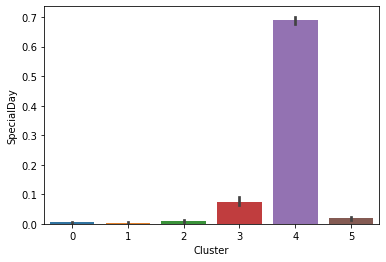

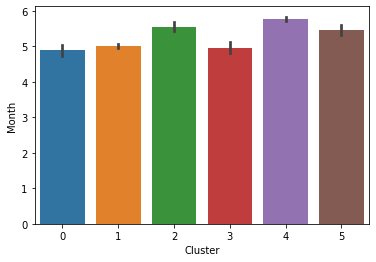

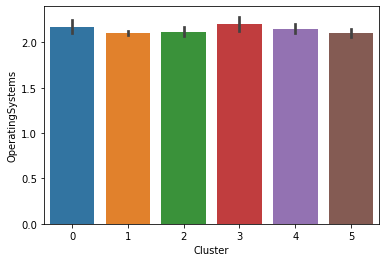

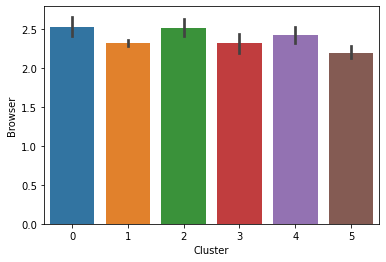

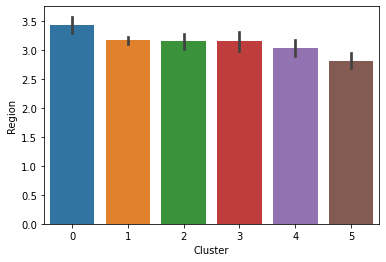

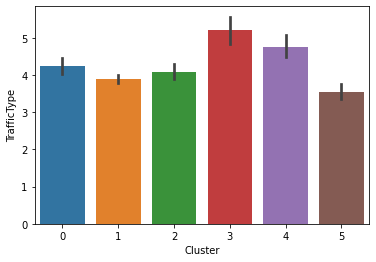

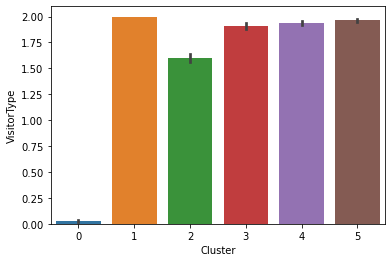

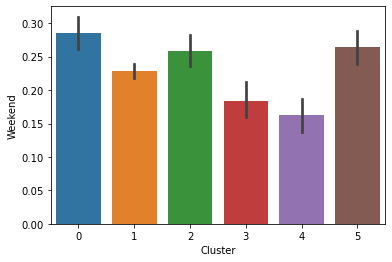

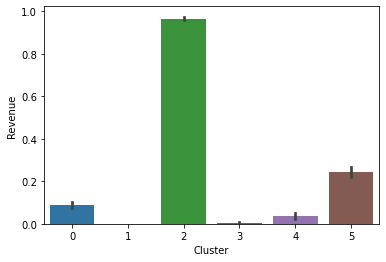

In [30]:
l = df.drop(columns= ['Cluster']).columns
for i in l:
    sns.barplot(x = df['Cluster'], y= df[i])
    plt.show()

## Perform PCA on the Dataset

In [46]:
pca = PCA(0.90)
X_pca = pca.fit_transform(X)

In [47]:
X_pca.shape

(12205, 13)

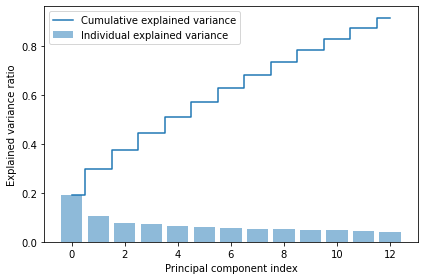

In [48]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#### Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
	

In [49]:
X_pca = pd.DataFrame(X_pca)

In [50]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.423687,3.321475,-0.382955,2.595185,1.547360,1.266666,-0.765832,0.321747,-0.637345,0.504020,-0.048245,0.624463,-0.169119
1,-1.530054,0.220075,-0.820640,0.036334,0.572187,1.178795,0.330808,-0.309648,-0.906630,0.298396,-0.173074,-0.352903,0.056119
2,-3.581300,3.202500,2.175366,0.553030,2.015469,1.059642,-0.810247,1.350855,1.286665,0.004779,-0.631872,0.182480,2.213345
3,-2.179311,1.155893,0.416193,0.025372,0.843561,0.987089,0.097388,-0.044231,-0.941870,0.186593,-0.332734,-0.223598,0.741432
4,-1.089863,-0.094632,0.013437,-0.678868,0.440462,-0.167926,1.179285,1.393507,-1.622446,0.788083,0.016368,-0.481336,0.110446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.417149,-0.325336,1.199225,-1.609220,0.492907,0.647286,0.834197,1.717020,-1.983563,1.835141,1.247028,-0.462664,0.269246
12201,-0.791449,-0.520633,0.013809,-0.595282,-0.728116,-1.685560,0.890000,0.879174,-1.352125,-0.595982,-0.003446,-0.682268,0.163499
12202,-1.869460,1.048429,1.201059,0.136130,-0.388495,-2.094154,0.375874,0.972728,-1.635064,-0.823713,-0.540572,-0.294018,-0.238228
12203,-0.255556,-0.276870,0.127944,-0.700265,-0.517296,-0.778980,-0.743474,-0.757250,-0.285507,-1.168026,-0.738775,-0.670787,-0.644107


We have 13 different principal components that now reduce the overall dimensions of this dataset by 5 total dimensions. These reduced dimensions means that it is less computationally expensive on our dataset and we can thus create better models using this dataset.

#### Applying Clustering on top of this

In [56]:
kn2 = KMeans(n_clusters=6)

In [57]:
kn2.fit(X_pca)

KMeans(n_clusters=6)

In [58]:
y_kmeanspred = kn2.predict(X_pca)

In [59]:
X_pca['Cluster'] = y_kmeanspred

In [60]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,Cluster
0,-3.423687,3.321475,-0.382955,2.595185,1.547360,1.266666,-0.765832,0.321747,-0.637345,0.504020,-0.048245,0.624463,-0.169119,5
1,-1.530054,0.220075,-0.820640,0.036334,0.572187,1.178795,0.330808,-0.309648,-0.906630,0.298396,-0.173074,-0.352903,0.056119,3
2,-3.581300,3.202500,2.175366,0.553030,2.015469,1.059642,-0.810247,1.350855,1.286665,0.004779,-0.631872,0.182480,2.213345,5
3,-2.179311,1.155893,0.416193,0.025372,0.843561,0.987089,0.097388,-0.044231,-0.941870,0.186593,-0.332734,-0.223598,0.741432,3
4,-1.089863,-0.094632,0.013437,-0.678868,0.440462,-0.167926,1.179285,1.393507,-1.622446,0.788083,0.016368,-0.481336,0.110446,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.417149,-0.325336,1.199225,-1.609220,0.492907,0.647286,0.834197,1.717020,-1.983563,1.835141,1.247028,-0.462664,0.269246,4
12201,-0.791449,-0.520633,0.013809,-0.595282,-0.728116,-1.685560,0.890000,0.879174,-1.352125,-0.595982,-0.003446,-0.682268,0.163499,4
12202,-1.869460,1.048429,1.201059,0.136130,-0.388495,-2.094154,0.375874,0.972728,-1.635064,-0.823713,-0.540572,-0.294018,-0.238228,4
12203,-0.255556,-0.276870,0.127944,-0.700265,-0.517296,-0.778980,-0.743474,-0.757250,-0.285507,-1.168026,-0.738775,-0.670787,-0.644107,3


#### Also try different graphs to visualize the clusters and its characteristics. 

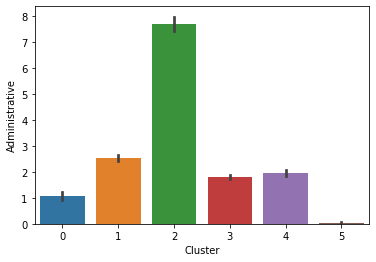

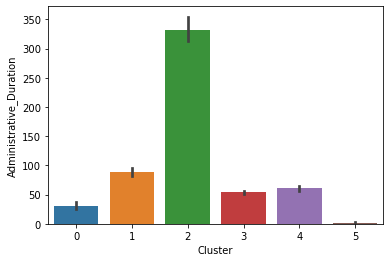

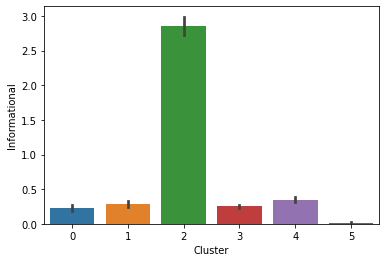

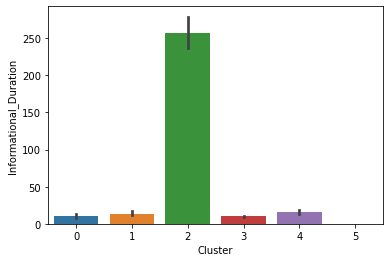

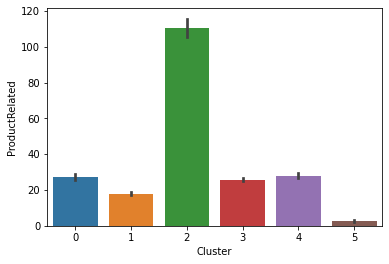

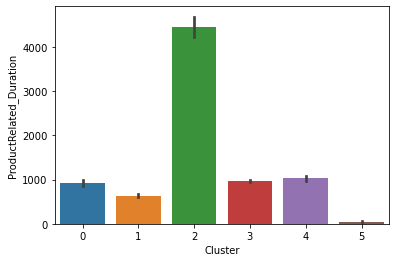

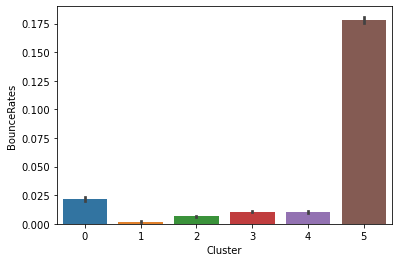

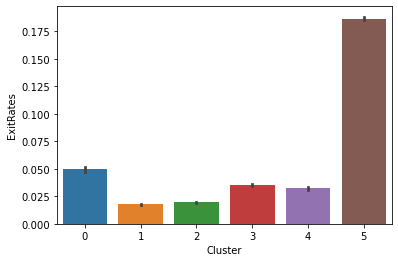

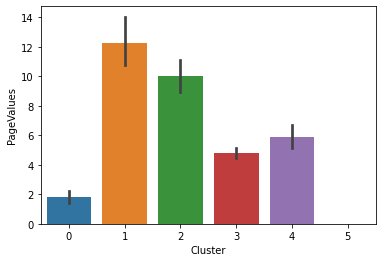

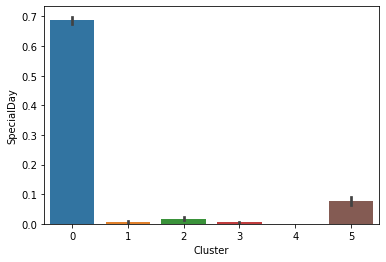

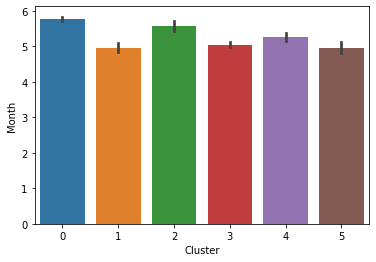

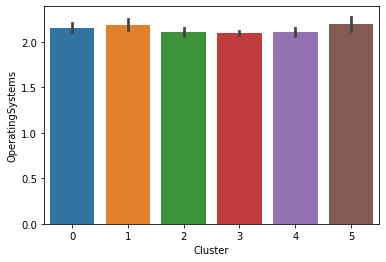

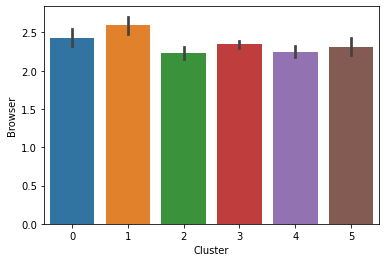

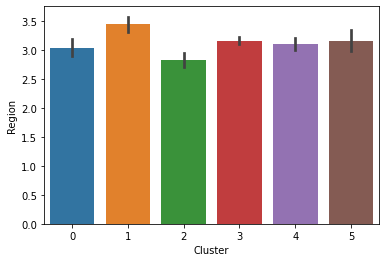

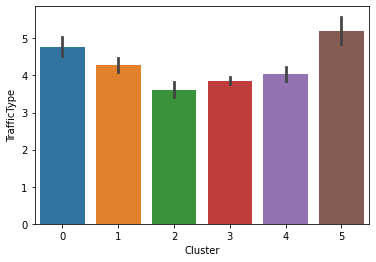

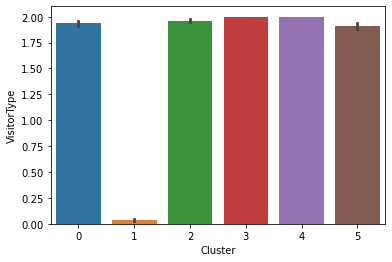

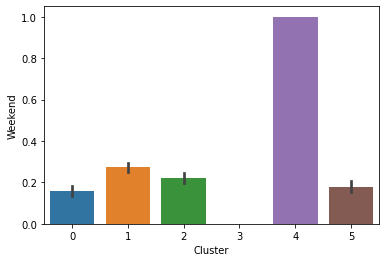

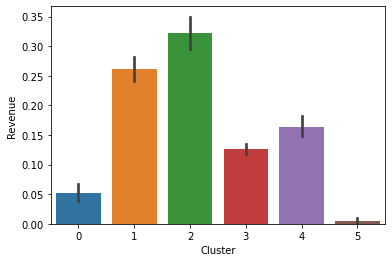

In [62]:
df['Cluster'] = y_kmeanspred
l = df.drop(columns= ['Cluster']).columns
for i in l:
    sns.barplot(x = df['Cluster'], y= df[i])
    plt.show()